## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

##### X

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

null нет, хайп!

##### target

In [4]:
any(np.isnan(y))

False

Тоже нет))

##### Категориальные признаки

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Все числовые - отлично, меньше напрягаться

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed(10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
# так как рассматриваем долю правильных ответов => берем accuracy
from sklearn.metrics import accuracy_score

In [11]:
cols = ['alcohol', 'magnesium']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [12]:
num_neighbours = [1, 3, 5, 10, 15, 25]
knns = [KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2) for k in num_neighbours]
print("NN\tTrain\tTest")
for k, knn in zip(num_neighbours, knns):
    knn.fit(X_train[cols], y_train)
    train_score = np.round(accuracy_score(y_train, knn.predict(X_train[cols])), 2)
    test_score = np.round(accuracy_score(y_test, knn.predict(X_test[cols])), 2)
    print(f"{k}\t{train_score}\t{test_score}")

NN	Train	Test
1	0.99	0.74
3	0.78	0.72
5	0.77	0.65
10	0.73	0.67
15	0.73	0.67
25	0.72	0.7


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
#!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [15]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

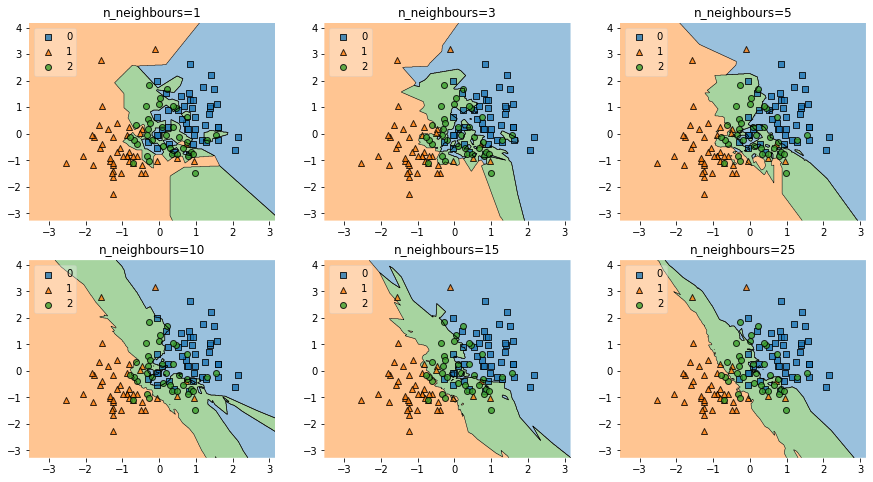

In [16]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 8))

labels = [f"n_neighbours={i}" for i in num_neighbours]
for clf, lab, grd in zip(knns, labels, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[cols].to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Как и ожмдалось, чем больше соседей, тем мягче границы. Для k=1 у нас полностью выучивается обучающая выборка => видим одинокие зеленки)) это не оч круто, так как обобщающая способность такого алгоритма будет слабенькой, что нас не устраивает(у 3 кста похожая картина). Также видим, что начиная с к=15 группа зеленок начинает теряться в синюшках (и наоборот), как следствие, неверная классификация. Так получилось потому что синий и зеленый класс неплохо так пересекаются и не могут быть идеально отделены прямой, а граница то становится все больше похожей на нее. А вот k=5, 10 выглядят оч даже найс. Это все подтверждается измерениями в 1.3, и если судить по ним, то k=3 выглядит идеальным кандидатом. Все таки тройка решает ту проблему с синим и зеленым классом, описанную выше

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

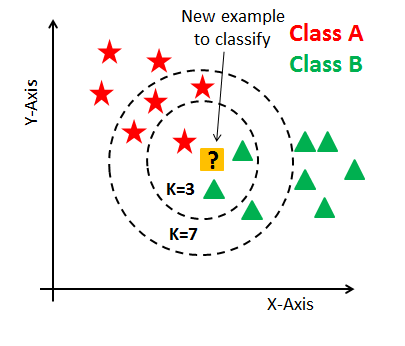

In [17]:
import numpy as np
from collections import Counter 
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree
from sklearn.base import BaseEstimator

In [18]:
class KNN(BaseEstimator):
    def __init__(self, k, algorithm='brute', metric='euclidean'): # по деволту евклидовая
        super(KNN, self).__init__()
        self.n_neighbors = k
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        # обучение сотсоит в запоминании обучающей выборки
        self.train_data = X
        self.train_labels = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.train_data)
    
    def predict(self, X):
        predictions = np.ones(X.shape[0], dtype='int')
        if self.algorithm == 'brute':
            if self.metric == 'euclidean':
                distances = cdist(X, self.train_data, 'minkowski', p=2) # (size_x, size_train)
            elif self.metric == 'cosine':
                distances = cdist(X, self.train_data, 'cosine') # (size_x, size_train)
            ind = distances.argsort()[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            if self.metric == 'euclidean':
                _, ind = self.tree.query(X, k=self.n_neighbors)
            elif self.metric == 'cosine':
                _, ind = self.tree.query(X, k=self.n_neighbors, metric='cosine')

        labels = np.array([self.train_labels[i] for i in ind])

        for i, cur_labels in enumerate(labels):
                counter = Counter(cur_labels).most_common(1)
                predictions[i] = int(counter[0][0])
        return predictions        

In [19]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [20]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [21]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [22]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Столбец unnamed полностью дублирует столбец индексов, можно убрать

In [23]:
data.drop(columns="Unnamed: 0", inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [24]:
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [25]:
data[num_features + ['price']].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Можем заметить, что x,y,z,carat сильно коррелируют между собой => можем сделать предположение, что carat есть линейная комбинация x, y, z

In [26]:
data[num_features + ['price']].corr()['price'].sort_values()

depth   -0.010647
table    0.127134
z        0.861249
y        0.865421
x        0.884435
carat    0.921591
price    1.000000
Name: price, dtype: float64

Признаки x, y, z, carat больше всего коррелируют с price

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [27]:
cat_features = ['cut', 'color', 'clarity']

In [28]:
dummies = pd.get_dummies(data[cat_features], drop_first=True)
dummies.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [29]:
data = pd.concat([data[num_features], dummies, data['price']], axis=1)
data.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
data.columns[-1]

'price'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data['price'], test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [32]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [34]:
linreg = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_train, linreg.predict(X_train)))
print(mean_squared_error(y_test, linreg.predict(X_test)))

1248523.1727086531
1348154.0890409101


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [35]:
linreg.coef_

array([ 5364.90631561,   -82.60808145,   -59.34777135, -1074.01024158,
          75.55588476,  -201.6316355 ,   584.31416726,   834.04589648,
         758.21906414,   739.91663406,  -205.10957356,  -277.68439959,
        -475.7341761 ,  -983.51016394, -1461.60932453, -2345.08085672,
        5277.82966865,  3580.97852534,  2608.74339444,  4489.54519073,
        4185.58558631,  4909.23545418,  4875.9860966 ])

Вещественные переменные это carat, depth, table, x, y, z, то есть первые 6 весов

In [36]:
weights = linreg.coef_[:6]
weights

array([ 5364.90631561,   -82.60808145,   -59.34777135, -1074.01024158,
          75.55588476,  -201.6316355 ])

чтобы оценить порядок разделим на макс

In [37]:
ratios = np.round(np.abs(weights) / np.max(weights), 3)
ratios

array([1.   , 0.015, 0.011, 0.2  , 0.014, 0.038])

In [38]:
for func in [np.mean, np.median]:
    print(func.__name__, func(ratios))

mean 0.21299999999999997
median 0.0265


возьмем медиану

In [39]:
amount = np.sum(ratios > 0.0265)
amount

3

In [40]:
idxs = np.argsort(ratios)[::-1][:amount]
weights[idxs]

array([ 5364.90631561, -1074.01024158,  -201.6316355 ])

In [41]:
X_train.columns[:6][idxs]

Index(['carat', 'x', 'z'], dtype='object')

Вот они (слева-направо:3) самые значимые среди вещественных в нашей модели, результат сходится с корреляционной таблицей

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

##### Lasso

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso(alpha=10).fit(X_train, y_train)
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

1464822.3882402633
1619706.029859677


In [44]:
lasso.coef_

array([ 4840.11828614,  -146.97514315,  -102.80856568,  -654.45923998,
          -0.        ,  -144.337596  ,    -0.        ,   172.53872371,
          69.27034726,   102.44426466,     5.93742262,    -0.        ,
        -104.03915785,  -606.56068162,  -999.15362497, -1743.09230211,
        1297.64082777,     0.        ,  -829.95456408,   805.32269833,
         568.70007871,  1127.6043854 ,  1162.11490678])

Уже видно, что некоторые признаки занулились(между прочим и один из вещественных - y). А вот веса не оч уменьшились... 

Похоже модель уловила лин. зависимость между x, y, z, carat => занулила один из них, так как он выражается через остальные. А именно y. Однако по оценке mse можно сказать, что тут проблема мультиколлениарности не играла весомую роль

##### Ridge

In [45]:
from sklearn.linear_model import Ridge

alpha поделим на 2, чтобы формула сошлась с той, что повыше в теории

In [62]:
ridge = Ridge(alpha=10 / 2).fit(X_train, y_train)
print(mean_squared_error(y_train, lasso.predict(X_train)))
print(mean_squared_error(y_test, lasso.predict(X_test)))

1464822.3882402633
1619706.029859677


In [63]:
ridge.coef_

array([ 5340.27371054,   -83.5694769 ,   -60.52777617, -1051.52694655,
          76.30648893,  -206.66340667,   598.27272436,   851.01850904,
         772.97109341,   757.92138807,  -199.04824083,  -271.73367302,
        -466.6687883 ,  -974.89742392, -1449.45933031, -2325.84451609,
        4951.05586229,  3278.32321253,  2310.15055273,  4182.16955478,
        3881.12803795,  4594.60945969,  4565.23053149])

Здесь же уменьшение весов особо не произошло, значит надо было коэффициент регуляризации побольше сделать...Ведь mse получается огромной и получается, что регуляризация особо то и не учитывается

mse же видим примерно такое же

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [64]:
alphas = [0.1, 1, 10, 100, 200]

In [65]:
def draw_plot(Model, name: str):
    norms = []
    for alpha in alphas:
        model = Model(alpha=alpha).fit(X_train, y_train)
        norms.append(np.linalg.norm(model.coef_))

    plt.figure(figsize=(20, 8))
    plt.grid()
    plt.xlabel(r'$\alpha$', fontsize=20)
    plt.ylabel('Норма весов', fontsize=20)
    plt.title(f'Зависимость нормы вектора весов от коэффициента регуляризации в {name}', fontsize=20)
    plt.xticks(alphas, fontsize=15)
    plt.plot(alphas, norms)
    plt.show()

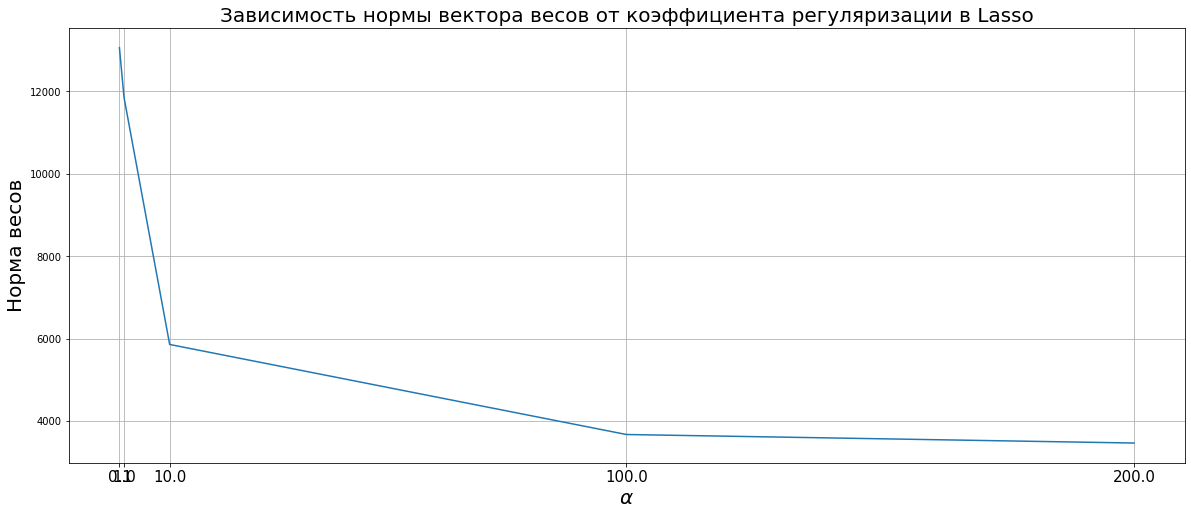

In [66]:
draw_plot(Lasso, "Lasso")

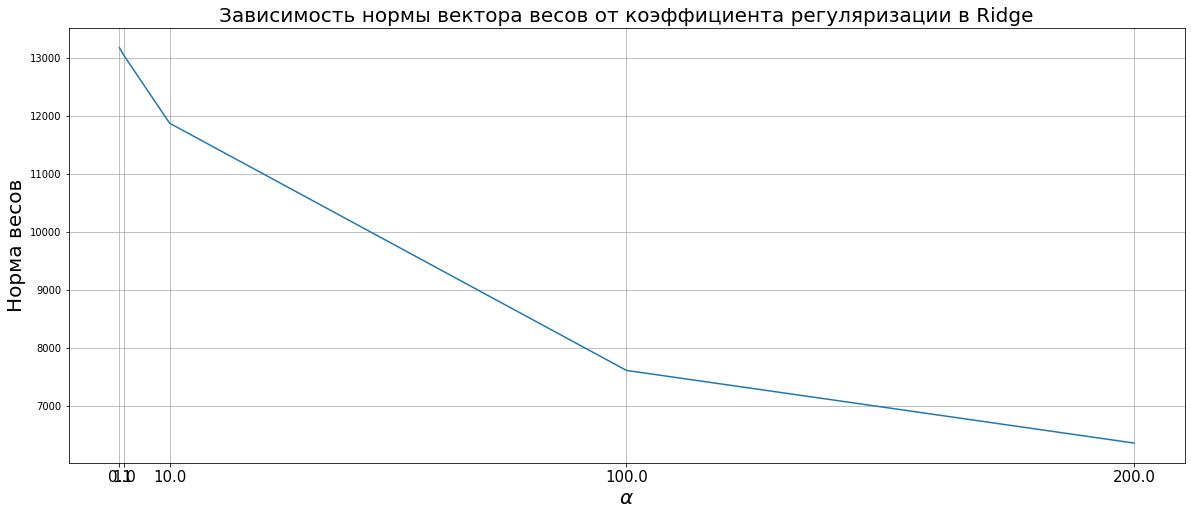

In [67]:
draw_plot(Ridge, "Ridge")

По графикам можно сказать, что lasso куда агрессивней уменьшает веса, хоть и удивительно, почему не ridge, ведь там дается бОльший штраф из-за возведения в квадрат

Почему же для отбора признаков используют Lasso, дак это из-за ее природы. Модуль именно зануляет, в то время как квадрат только стримится приблизить к 0

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [68]:
from sklearn.linear_model import LassoCV

In [69]:
lasso_cv = LassoCV(alphas=alphas, cv=5, n_jobs=-1).fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 857134086.1902962, tolerance: 47548656.07636777
  model = cd_fast.enet_coordinate_descent_gram(


In [70]:
lasso_cv.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [71]:
lasso_cv.mse_path_

array([[2390819.25226982, 2479997.11167867, 2431483.69032984,
        2442246.47504555, 2269641.4911954 ],
       [2160893.41271205, 2254404.50148954, 2212245.4643758 ,
        2224924.8173963 , 2060133.53508558],
       [1423050.10145201, 1509459.48865563, 1480401.74184173,
        1553091.69582321, 1370252.59516987],
       [1223796.85064884, 1310959.56570453, 1246774.96604589,
        1310398.66880218, 1189930.15458261],
       [1222950.56350088, 1307662.71285448, 1241322.52302609,
        1299058.85397189, 1188209.2576772 ]])

In [72]:
mse_means = np.mean(lasso_cv.mse_path_, axis=1)
mse_means

array([2402837.60410386, 2182520.34621185, 1467251.12458849,
       1256372.04115681, 1251840.78220611])

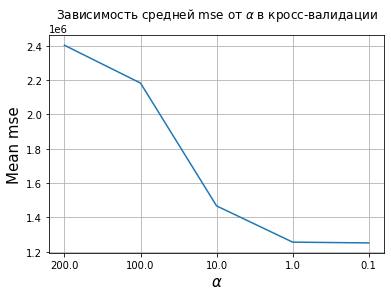

In [73]:
plt.grid()
plt.xticks(np.arange(mse_means.size), lasso_cv.alphas_)
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel('Mean mse', fontsize=15)
plt.title(r'Зависимость средней mse от $\alpha$ в кросс-валидации')
plt.plot(np.arange(mse_means.size), mse_means);

In [74]:
lasso_cv.alphas_[np.argmin(mse_means)]

0.1

Лучше всего оказался 0.1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [75]:
final_lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print(mean_squared_error(y_train, final_lasso.predict(X_train)))
print(mean_squared_error(y_test, final_lasso.predict(X_test)))

1248572.2512876347
1348302.8360680763


In [76]:
final_lasso.coef_

array([ 5359.4730449 ,   -83.88526082,   -59.95479965, -1063.75117065,
          66.20131525,  -198.52593303,   574.71306784,   824.83619494,
         748.54052834,   731.2872292 ,  -199.7198005 ,  -272.40343432,
        -469.89995365,  -977.67083052, -1454.82180495, -2336.76200026,
        5219.24254103,  3526.54098502,  2554.73357263,  4434.07276622,
        4130.81757663,  4852.57824386,  4820.10745525])

Почему то в моем случае, лучше всего работает без регуляризации))) коэффициент 0.1 дэмн. Отсюда виден результат, ни одного нулевого признака, не интересно вышло :( Однако, если бы коэффициент был повыше, то думаю занулился как минимум один из x,y,z,carat, как обсуждалось выше

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [77]:
for name, model in zip(['linreg', 'lasso'], [linreg, final_lasso]):
    print("%5s\t%.3f" % (name, mean_squared_error(y_test, model.predict(X_test))))

linreg	1348154.089
lasso	1348302.836


Базовая модель оказалась лучше, нежели с регуляризацией. Такое может происходить, ведь lasso старается занулить признаки, даже если они и приносят какой-то вклад в итог